In [86]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [87]:
df = pd.read_csv("./data/customer_features_final.csv")

In [88]:
rfm = df[['Recency','Frequency', 'Monetary']]

In [89]:
inertias = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=10000)
    kmeans.fit(rfm)
    inertias.append(kmeans.inertia_)

In [90]:
import matplotlib.pyplot as plt

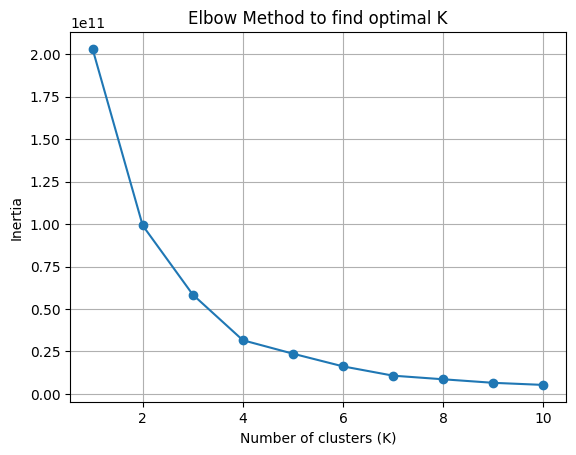

In [91]:
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to find optimal K')
plt.grid(True)
plt.show()

In [92]:
# Choose K = 4
kmeans = KMeans(n_clusters=4, random_state=10000)
kmeans.fit(rfm)
labels = kmeans.predict(rfm)

df['cluster'] = labels

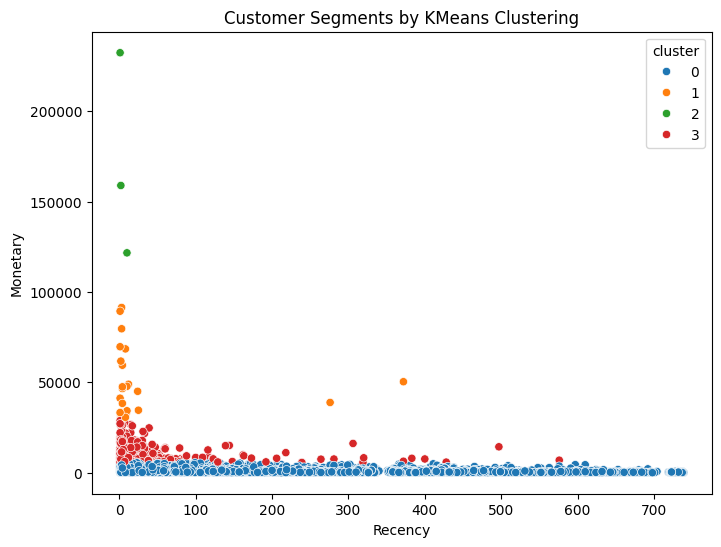

In [93]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Recency', y='Monetary', hue='cluster', palette='tab10')
plt.title('Customer Segments by KMeans Clustering')
plt.show()

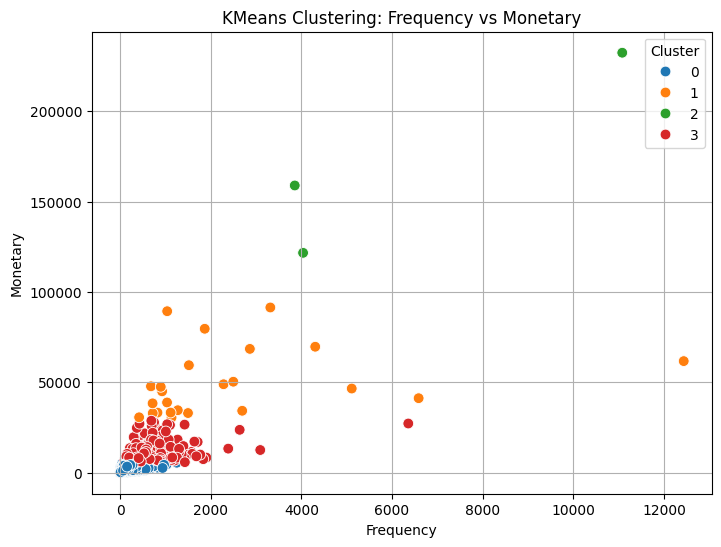

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Frequency',
    y='Monetary',
    hue='cluster',
    palette='tab10',
    s=60
)

plt.title("KMeans Clustering: Frequency vs Monetary")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [95]:
df.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)


,Recency,Frequency,Monetary
cluster,,,
0,214.8,85.3,1105.0
1,32.8,2407.5,49465.4
2,4.3,6323.7,170986.5
3,35.3,583.6,10153.7


# Phân khúc khách hàng bằng KMeans trên dữ liệu RFM (random_state=10000)

## Tổng quan cụm

| Cụm     | Tên phân khúc          | Recency | Frequency | Monetary  |
|---------|-------------------------|---------|-----------|-----------|
| 0       | Khách hàng rời đi       | 214.8   | 85.3      | 1,105.0   |
| 1       | Khách hàng trung thành  | 32.8    | 2,407.5   | 49,465.4  |
| 2       | Khách hàng VIP          | 4.3     | 6,323.7   | 170,986.5 |
| 3       | Khách hàng tiềm năng    | 35.3    | 583.6     | 10,153.7  |

---

## Cụm 0 – Khách hàng rời đi

- **Recency cao (~215 ngày)**: đã lâu không mua hàng.
- **Tần suất thấp**, **giá trị chi tiêu rất thấp**.
- Đây là nhóm khách hàng gần như không còn tương tác.

**Hành động gợi ý**:
- Gửi email tái tương tác hoặc khuyến mãi đặc biệt.
- Cân nhắc loại bỏ khỏi các chiến dịch chính nếu tỷ lệ phản hồi thấp.

---

## Cụm 1 – Khách hàng trung thành

- **Recency thấp (~33 ngày)**, **tần suất mua cao (~2407 lần)**, **giá trị chi tiêu cao (~49,000)**.
- Đây là nhóm khách hàng ổn định và đóng góp lớn cho doanh thu.

**Hành động gợi ý**:
- Duy trì mối quan hệ bằng ưu đãi định kỳ, chương trình tích điểm.
- Cá nhân hóa nội dung marketing để tăng lòng trung thành.

---

## Cụm 2 – Khách hàng VIP

- **Recency rất thấp (~4 ngày)**, **tần suất cực cao (~6324 lần)**, **chi tiêu cực lớn (~171,000)**.
- Là nhóm khách hàng quan trọng nhất, mang lại giá trị lớn nhất.

**Hành động gợi ý**:
- Ưu đãi đặc biệt, chăm sóc riêng biệt.
- Khuyến khích giới thiệu bạn bè hoặc tham gia chương trình khách hàng thân thiết cao cấp.

---

## Cụm 3 – Khách hàng tiềm năng

- **Recency thấp (~35 ngày)**, **tần suất vừa (~583 lần)**, **chi tiêu trung bình (~10,000)**.
- Nhóm khách hàng mới hoặc đang hình thành thói quen mua hàng.

**Hành động gợi ý**:
- Tăng tần suất tương tác qua email, ưu đãi gợi ý sản phẩm.
- Chăm sóc để chuyển hóa thành khách hàng trung thành.


In [96]:
label_map = {
    0: 'Lost Customers',
    1: 'Loyal Customers',
    2: 'VIP Customers',
    3: 'Potential Customers'
}

df['segment'] = df['cluster'].map(label_map)


In [97]:
df.to_csv('./data/customer_segment.csv')